In [1]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt
import scipy.integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Cosmology
ome_rad, ome_m, ome_k, ome_DE, H_0, c = 0, 0.23, 0, 0.73, 73.8, 299792

In [3]:
#System 1
Z_1, theta_11, theta_12 = [0.04956, 0.694, 0.954], [2.74, 0.13, 1.56], [2.77, 0.19, 1.57]
sigma_1 = [(theta_11[1] + theta_11[2])/2 , (theta_12[1] + theta_12[2])/2]
sigma_s1 = 2*theta_11[0]*np.sqrt(sigma_1[0]**2
                            + (theta_11[0]**2/theta_12[0]**2)*sigma_1[1]**2)/theta_12[0]**2
beta_1_exp = theta_11[0]**2/theta_12[0]**2
#Sytem 2
Z_2, theta_21, theta_22 = [0.04865, 0.165, 0.264], [1.85, 0.06, 1.13], [2.27, 0.08, 1.50]
sigma_2 = [(theta_21[1] + theta_21[2])/2 , (theta_22[1] + theta_22[2])/2]
sigma_s2 = 2*theta_21[0]*np.sqrt(sigma_2[0]**2
                            + (theta_21[0]**2/theta_22[0]**2)*sigma_2[1]**2)/theta_22[0]**2
beta_2_exp = theta_21[0]**2/theta_22[0]**2

In [4]:
E_function = lambda z: 1/np.sqrt( ome_rad*(1+z)**4 + ome_m*(1+z)**3 + ome_k*(1+z)**2 
                    + (1-ome_m)*(1+z)**(3*(1+ome_0 + ome_a))*np.exp(-3*ome_a*(1-(1+z)**-1)))

def angular_diameter(z1, z2):
    integral = scipy.integrate.quad(E_function, z1, z2)[0]
    distance = c*integral/((1+z2)*H_0)
    return distance

def chi_squared(beta_1, beta_2):
    chi = (beta_1_exp - beta_1)**2/sigma_s1 + (beta_2_exp - beta_2)**2/sigma_s2
    return(chi)

In [5]:
ome_0=-0.9 
ome_a=0.2 
#System 1
Ds11, Ds12 = angular_diameter(0, Z_1[1]), angular_diameter(0, Z_1[2])
Dls11, Dls12 = angular_diameter(Z_1[0], Z_1[1]), angular_diameter(Z_1[0], Z_1[2])
beta_1 = (Dls11*Ds12)/(Dls12*Ds11)
#System 2
Ds21, Ds22 = angular_diameter(0, Z_2[1]), angular_diameter(0, Z_2[2])
Dls21, Dls22 = angular_diameter(Z_2[0], Z_2[1]), angular_diameter(Z_2[0], Z_2[2])
beta_2 = (Dls21*Ds22)/(Dls22*Ds21)
print(chi_squared(beta_1, beta_2))

0.06389136237597992


In [6]:
ome_0_values = [-1.3, -1.2, -1.1, -0.9, -0.7]
ome_a_values = [-1.5, -0.5, 0, 0.6, 1.3]
x_ome_0 = []
y_ome_a = []
chi_squared_values = []
for ome_0 in ome_0_values:
    for ome_a in ome_a_values:
        #System 1
        Ds11, Ds12 = angular_diameter(0, Z_1[1]), angular_diameter(0, Z_1[2])
        Dls11, Dls12 = angular_diameter(Z_1[0], Z_1[1]), angular_diameter(Z_1[0], Z_1[2])
        beta_1 = (Dls11*Ds12)/(Dls12*Ds11)
        #System 2
        Ds21, Ds22 = angular_diameter(0, Z_2[1]), angular_diameter(0, Z_2[2])
        Dls21, Dls22 = angular_diameter(Z_2[0], Z_2[1]), angular_diameter(Z_2[0], Z_2[2])
        beta_2 = (Dls21*Ds22)/(Dls22*Ds21)
        x_ome_0.append(ome_0)
        y_ome_a.append(ome_a)
        chi_squared_values.append(chi_squared(beta_1, beta_2))        

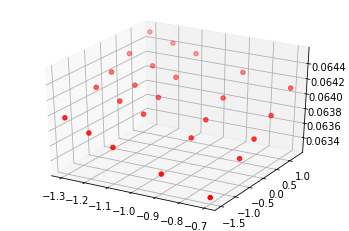

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ome_0, y_ome_a, chi_squared_values, c='r', marker='o')
plt.show()
# x = omega 0, y = omega a

In [127]:
#ome_0_values = [1.8, -1.3, -1.2, -1.1, -0.9, -0.7, -0.5, 0, 0.5, 1, 1.5, 2.0, 3, 4, 5, 8, 10, 13, 18, 20, 25, 30, 35, 40]
#ome_a_values = [-120, -110, -100, -90, -80, 70, -60, -65, -50, -30, -25, -20, -18, -16, -15, -14, -13, -12, -10, -9, -8, -7.5, -7, -7.5, -6, -5.5, -5, -3., -2.5, -2.0, -1.5, -0.5, 0, 0.6, 1.3, 1.5, 2.0]
ome_0_values = np.linspace(-1.5, 0, 30)
ome_a_values = np.linspace(-2, 1.5, 30)  
chi_squared_values = np.zeros((len(ome_a_values),len(ome_0_values)))
for i in range(len(ome_a_values)):
    ome_a = ome_a_values[i]
    for j in range(len(ome_0_values)):
        ome_0 = ome_0_values[j]
        #System 1
        Ds11, Ds12 = angular_diameter(0, Z_1[1]), angular_diameter(0, Z_1[2])
        Dls11, Dls12 = angular_diameter(Z_1[0], Z_1[1]), angular_diameter(Z_1[0], Z_1[2])
        beta_1 = (Dls11*Ds12)/(Dls12*Ds11)
        #System 2
        Ds21, Ds22 = angular_diameter(0, Z_2[1]), angular_diameter(0, Z_2[2])
        Dls21, Dls22 = angular_diameter(Z_2[0], Z_2[1]), angular_diameter(Z_2[0], Z_2[2])
        beta_2 = (Dls21*Ds22)/(Dls22*Ds21)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)    

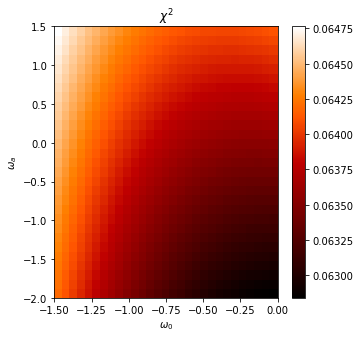

In [128]:
xmesh,ymesh=np.meshgrid(ome_0_values,ome_a_values)
plt.figure(figsize=(5,5))
plt.pcolormesh(xmesh, ymesh, chi_squared_values, cmap='gist_heat')
plt.title(u'$\chi^2$')
plt.xlabel(u'$\omega_0$')
plt.ylabel(u'$\omega_a$')
plt.colorbar()
plt.show()